In [54]:
import os
import pandas
import numpy
import math
import matplotlib
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel

In [2]:
# Settings
filename = "MA_Public_Schools_2017.csv"
start_year = 2010
stop_year = 2017
y_column_name = "% Graduated"
ignore_columns = [
    "High School Graduates (#)",
    "% Dropped Out",
    "% Still in School",
    "School Code",
    "School Name",
    "Contact Name",
    "Address 1",
    "Address 2",
    "Town",
    "State",
    "Zip",
    "Phone",
    "Fax",
    "District Name",
    "% Still in School",
    "% Non-Grad Completers",
    "% GED",
    "% Dropped Out",
    "% Permanently Excluded",
    "High School Graduates (#)",
    "Attending Coll./Univ. (#)",
    "Accountability and Assistance Description",
    "District_Accountability and Assistance Description",
]
floatify_columns = ["AP_Test Takers", "AP_Tests Taken"]
levelize_columns = ["Accountability and Assistance Level", "District_Accountability and Assistance Level"]
gradify_columns = ["Grade"]

In [3]:
# Load the data
df = pandas.read_csv(filename)

In [4]:
df

,School Code,School Name,School Type,Function,Contact Name,Address 1,Address 2,Town,State,Zip,...,MCAS_10thGrade_English_Incl. in SGP(#),Accountability and Assistance Level,Accountability and Assistance Description,School Accountability Percentile (1-99),Progress and Performance Index (PPI) - All Students,Progress and Performance Index (PPI) - High Needs Students,District_Accountability and Assistance Level,District_Accountability and Assistance Description,District_Progress and Performance Index (PPI) - All Students,District_Progress and Performance Index (PPI) - High Needs Students
0,10505,Abington High,Public School,Principal,Teresa Sullivan-Cruz,201 Gliniewicz Way,NaN,Abington,MA,2351,...,111.0,Level 1,Meeting gap narrowing goals,42.0,76.0,75.0,Level 3,One or more schools in the district classified...,63.0,60.0
1,10003,Beaver Brook Elementary School,Public School,Principal,Catherine Zinni,1 Ralph Hamlin Lane,NaN,Abington,MA,2351,...,NaN,Level 3,Among lowest performing 20% of subgroups,34.0,69.0,73.0,Level 3,One or more schools in the district classified...,63.0,60.0
2,10002,Center Elementary School,Public School,Principal,Lora Monachino,201 Gliniewicz Way,NaN,Abington,MA,2351,...,NaN,Insufficient data,NaN,NaN,NaN,NaN,Level 3,One or more schools in the district classified...,63.0,60.0
3,10405,Frolio Middle School,Public School,Principal,Matthew MacCurtain,201 Gliniewicz Way,NaN,Abington,MA,2351,...,NaN,Level 2,Not meeting gap narrowing goals,40.0,63.0,64.0,Level 3,One or more schools in the district classified...,63.0,60.0
4,10015,Woodsdale Elementary School,Public School,Principal,Jonathan Hawes,128 Chestnut Street,NaN,Abington,MA,2351,...,NaN,Level 2,Not meeting gap narrowing goals,52.0,65.0,67.0,Level 3,One or more schools in the district classified...,63.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,35060505,Pioneer Charter School of Science II (PCSS-II),Charter School,Principal,Vahit Sevinc,97 Main Street,NaN,Saugus,MA,1906,...,30.0,Insufficient data,NaN,NaN,NaN,NaN,Insufficient data,NaN,NaN,NaN
1857,35100205,Springfield Preparatory Charter School,Charter School,Principal,Bill Spirer,370 Pine St.,NaN,Springfield,MA,1105,...,NaN,Insufficient data,NaN,NaN,NaN,NaN,Insufficient data,NaN,NaN,NaN
1858,39020900,TEC Connections Academy Commonwealth Virtual S...,Public School,Principal,Adam Goldberg,141 Mansion Drive,NaN,East Walpole,MA,2032,...,28.0,Level 3,Very low assessment participation (Less than 90%),NaN,NaN,NaN,Level 3,Very low assessment participation (Less than 90%),NaN,NaN
1859,35050405,UP Academy Charter School of Dorchester,Charter School,Principal,Jabari Peddie,35 Westville Street,NaN,Boston,MA,2124,...,NaN,Level 1,Meeting gap narrowing goals,35.0,92.0,98.0,Level 1,Meeting gap narrowing goals,92.0,98.0


In [5]:
for column in df.columns:
    print(column)

School Code
School Name
School Type
Function
Contact Name
Address 1
Address 2
Town
State
Zip
Phone
Fax
Grade
District Name
District Code
PK_Enrollment
K_Enrollment
1_Enrollment
2_Enrollment
3_Enrollment
4_Enrollment
5_Enrollment
6_Enrollment
7_Enrollment
8_Enrollment
9_Enrollment
10_Enrollment
11_Enrollment
12_Enrollment
SP_Enrollment
TOTAL_Enrollment
First Language Not English
% First Language Not English
English Language Learner
% English Language Learner
Students With Disabilities
% Students With Disabilities
High Needs
% High Needs
Economically Disadvantaged
% Economically Disadvantaged
% African American
% Asian
% Hispanic
% White
% Native American
% Native Hawaiian, Pacific Islander
% Multi-Race, Non-Hispanic
% Males
% Females
Total # of Classes
Average Class Size
Number of Students
Salary Totals
Average Salary
FTE Count
In-District Expenditures
Total In-district FTEs
Average In-District Expenditures per Pupil
Total Expenditures
Total Pupil FTEs
Average Expenditures per Pupil
# i

In [6]:
df[y_column_name].describe()

count    376.000000
mean      83.327394
std       21.459396
min        0.000000
25%       82.150000
50%       92.250000
75%       96.200000
max      100.000000
Name: % Graduated, dtype: float64

In [7]:
df[y_column_name].isna().sum()

1485

In [8]:
# Get rid of errored/confusing data
df_slim = df
for column in ignore_columns:
    if column in df_slim.columns:
        df_slim = df_slim.drop(column, 1)

In [9]:
# Columns that were removed
for column in df.columns:
    if column not in df_slim.columns:
        print(column)

School Code
School Name
Contact Name
Address 1
Address 2
Town
State
Zip
Phone
Fax
District Name
% Still in School
% Non-Grad Completers
% GED
% Dropped Out
% Permanently Excluded
High School Graduates (#)
Attending Coll./Univ. (#)
Accountability and Assistance Description
District_Accountability and Assistance Description


In [10]:
df_slim.isna().sum().sum()

368130

In [11]:
# Fix Data
df_clean = df_slim

for column in floatify_columns:
    for row in range(df_clean.shape[0]):
        if type(df_clean.loc[row, column]) is str:
            df_clean.loc[row, column] = float(df_clean.loc[row, column].replace(',', ''))

for column in levelize_columns:
    for row in range(df_clean.shape[0]):
        value = df_clean.loc[row, column]
        if value == "Insufficient data":
            df_clean.loc[row, column] = None
        elif value == "Level 1":
            df_clean.loc[row, column] = 1
        elif df_clean.loc[row, column] == "Level 2":
            df_clean.loc[row, column] = 2
        elif df_clean.loc[row, column] == "Level 3":
            df_clean.loc[row, column] = 3
        elif df_clean.loc[row, column] == "Level 4":
            df_clean.loc[row, column] = 4
        elif df_clean.loc[row, column] == "Level 5":
            df_clean.loc[row, column] = 5

grades = ["PK", "K", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]

for grade in grades:
    df_clean["Grade " + grade] = numpy.full(df_clean.shape[0], 0)

for column in gradify_columns:
    for row in range(df_clean.shape[0]):
        if type(df_clean.loc[row, column]) is not float:
            for current_grade in df_clean.loc[row, column].replace("0", "").split(","):
                df_clean.loc[row, "Grade " + current_grade] = 1

In [12]:
# Get the District Modes (This takes a long time)
def mode_2(rows):
    ret = None
    mode_ret = rows.mode()
    if mode_ret.shape[0] > 0:
        ret = mode_ret[0]
    return(ret)

def mode_1(data_frame):
    return(data_frame.apply(mode_2))

df_mode = df_clean.groupby("District Code").apply(mode_1)

In [13]:
# Get the District Means and replace any NA's we can with the District Modes
df_mean = df_clean.groupby("District Code").mean()

df_districts = df_mean.combine_first(df_mode)

for grade_column in grades:
    column_name = "Grade " + grade_column
    df_districts[column_name][df_districts[column_name] > 0] = 1

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
df_districts

,# in Cohort,% AP_Score 1-2,% AP_Score 3-5,% African American,% Asian,% Attending College,% Economically Disadvantaged,% English Language Learner,% Females,% First Language Not English,...,SP_Enrollment,Salary Totals,School Accountability Percentile (1-99),School Type,Students With Disabilities,TOTAL_Enrollment,Total # of Classes,Total Expenditures,Total In-district FTEs,Total Pupil FTEs
District Code,,,,,,,,,,,,,,,,,,,,,
10000,114.0,43.9,56.1,2.4800,1.9200,75.8,21.080000,3.280000,49.1800,8.000000,...,0.80,9489496.0,42.000000,Public School,49.000000,383.200000,196.000000,27229100.80,1939.0,2051.8
30000,NaN,NaN,NaN,0.7000,0.2000,NaN,22.500000,0.450000,48.0000,0.800000,...,0.00,4543438.0,59.000000,Public School,67.000000,477.500000,273.000000,15201154.44,967.5,1281.7
50000,325.0,33.6,66.4,2.3625,3.3125,81.6,28.675000,6.712500,47.6625,9.437500,...,0.75,20849537.0,46.142857,Public School,77.750000,489.750000,325.000000,59044278.63,3976.8,4110.8
70000,86.0,19.0,81.0,1.7600,0.9400,72.6,32.560000,1.200000,45.0200,2.160000,...,0.20,12158388.0,54.750000,Public School,85.200000,430.000000,238.200000,33668081.30,2272.2,2444.7
80000,NaN,NaN,NaN,9.6000,14.5000,NaN,32.133333,16.733333,49.1000,26.533333,...,0.00,8191622.0,52.000000,Public School,74.333333,382.666667,108.666667,25999942.00,1183.5,1284.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,Charter School,NaN,0.000000,NaN,NaN,NaN,NaN
35160000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,Charter School,NaN,0.000000,NaN,NaN,NaN,NaN
35170000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,Charter School,NaN,0.000000,NaN,NaN,NaN,NaN


In [15]:
df_districts.isna().sum().sum()

61228

In [16]:
# Fix NA's
df_no_na = df_districts.copy().fillna(df_districts.mean()).fillna(df_districts.mode()).dropna(1)

In [17]:
# Columns that were removed
for column in df_slim.columns:
    if column not in df_no_na.columns:
        print(column)

MCAS_3rdGrade_Math_SGP
MCAS_3rdGrade_Math_Incl. in SGP(#)
MCAS_3rdGrade_English_SGP
MCAS_3rdGrade_English_Incl. in SGP(#)


In [18]:
# Select only features that impact the R^2
df_selected_features = df_no_na

x = df_selected_features.drop(y_column_name, 1)
y = df_selected_features[y_column_name]

x_encoded = x.apply(LabelEncoder().fit_transform)

x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.5)

# model = RFECV(AdaBoostRegressor(), cv=5, verbose=True)

# model.fit(x_train, y_train)
# df_selected_features = df_selected_features.drop(x.columns[model.support_ == False], 1)

model = AdaBoostRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r_2 = r2_score(y_test, y_pred)

r_2s = [r_2]

current = 0
end = df_selected_features.shape[1]

changed = True

while df_selected_features.shape[1] > 2 and current < end:
    features = df_selected_features.columns.drop(y_column_name)
    current_feature = features[len(features) - 1]
    df_features_this_loop = df_selected_features.drop(current_feature, 1)

    x = df_features_this_loop.drop(y_column_name, 1)
    y = df_features_this_loop[y_column_name]

    x_encoded = x.apply(LabelEncoder().fit_transform)

    x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.5)

    model = AdaBoostRegressor()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    current_r_2 = r2_score(y_test, y_pred)

    if r_2 - current_r_2 < 0.03:
        r_2 = current_r_2
        df_selected_features = df_features_this_loop
        end -= 1
        r_2s.append(current_r_2)

    current += 1

[]

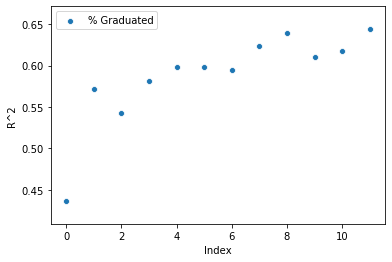

In [19]:
matplotlib.pyplot.figure()
seaborn.scatterplot(y="R^2", x="Index", label=y_column_name, data=pandas.DataFrame({"R^2": r_2s, "Index": range(len(r_2s))})).plot()

In [20]:
# Columns that were removed
for column in df_clean.columns:
    if column not in df_selected_features.columns:
        print(column)

School Type
SP_Enrollment
TOTAL_Enrollment
Students With Disabilities
Total # of Classes
Salary Totals
Total In-district FTEs
Total Expenditures
Total Pupil FTEs
SAT_Tests Taken
MCAS_3rdGrade_Math_SGP
MCAS_3rdGrade_Math_Incl. in SGP(#)
MCAS_3rdGrade_English_SGP
MCAS_3rdGrade_English_Incl. in SGP(#)
School Accountability Percentile (1-99)


In [44]:
# Split data
x = df_selected_features.drop(y_column_name, 1)
y = df_selected_features[y_column_name]

x_encoded = x.apply(LabelEncoder().fit_transform)

x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.5)

In [45]:
# Ridge Regression
model = RidgeCV()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [46]:
# R^2
print(r2_score(y_test, y_pred))

-0.6379100621139171


In [47]:
# Selected Columns
columns = []
coefficients = []
for index in range(len(model.coef_)):
    if model.coef_[index] > 0:
        columns.append(x_train.columns[index])
        coefficients.append(model.coef_[index])

coefficients_sorted = pandas.DataFrame({"Column": columns, "Coefficient": coefficients}).sort_values("Coefficient", ascending=False)

for index in range(coefficients_sorted.shape[0]):
    print("{0:<100.100}: {1:4.4f}".format(coefficients_sorted.iloc[index, 0], coefficients_sorted.iloc[index, 1]))

MCAS_10thGrade_English_Stud. Incl. #                                                                : 1.6538
Accountability and Assistance Level                                                                 : 1.4990
Grade PK                                                                                            : 1.0169
Grade 5                                                                                             : 0.7037
% MCAS_10thGrade_Math_W/F                                                                           : 0.5870
MCAS_6thGrade_Math_NI #                                                                             : 0.5829
% MCAS_10thGrade_English_A                                                                          : 0.5803
Grade 3                                                                                             : 0.5409
% MCAS_10thGrade_Math_NI                                                                            : 0.5122
% MCAS_10thGrade_Ma

In [48]:
# Neural Network Regressor
model = MLPRegressor(max_iter=1000000, learning_rate="adaptive", early_stopping=True)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [49]:
# R^2
print(r2_score(y_test, y_pred))

-1.3150263110258016


In [64]:
# Ada Boost Regression
model = AdaBoostRegressor()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [65]:
# R^2
print(r2_score(y_test, y_pred))

0.4449454356185505


In [66]:
columns = []
importances = []
for index in range(len(model.feature_importances_)):
    if model.feature_importances_[index] > 0.01:
        columns.append(x_train.columns[index])
        importances.append(model.feature_importances_[index])

importance_sorted = pandas.DataFrame({"Column": columns, "Importance": importances}).sort_values("Importance", ascending=False)

for index in range(importance_sorted.shape[0]):
    print("{0:<100.100}: {1:4.4f}".format(importance_sorted.iloc[index, 0], importance_sorted.iloc[index, 1]))

% MCAS_10thGrade_Math_P+A                                                                           : 0.2095
% High Needs                                                                                        : 0.0810
MCAS_10thGrade_English_CPI                                                                          : 0.0575
MCAS_10thGrade_Math_CPI                                                                             : 0.0536
% Native Hawaiian, Pacific Islander                                                                 : 0.0407
% Students With Disabilities                                                                        : 0.0393
SAT_Tests Taken                                                                                     : 0.0375
% MCAS_10thGrade_English_NI                                                                         : 0.0331
PK_Enrollment                                                                                       : 0.0259
% Females          

In [67]:
selection = SelectFromModel(estimator=AdaBoostRegressor()).fit(x_train, y_train)
x_important = selection.transform(x)

In [68]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.5)

In [69]:
# Ada Boost Regression
model = AdaBoostRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [70]:
# R^2
print(r2_score(y_test, y_pred))

0.4496832002860901


In [63]:
# Split data
x = df_no_na.drop(y_column_name, 1)
y = df_no_na[y_column_name]

x_encoded = x.apply(LabelEncoder().fit_transform)

x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.5)

In [60]:
# Lasso Regression
from sklearn.linear_model import LassoCV
model = LassoCV(max_iter=10000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [61]:
# R^2
print(r2_score(y_test, y_pred))

0.38754039790487993


In [62]:
columns = []
importances = []
for index in range(len(model.coef_)):
    if model.coef_[index] > 0:
        columns.append(x_train.columns[index])
        importances.append(model.coef_[index])

importance_sorted = pandas.DataFrame({"Column": columns, "Importance": importances}).sort_values("Importance", ascending=False)

for index in range(importance_sorted.shape[0]):
    print("{0:<100.100}: {1:4.4f}".format(importance_sorted.iloc[index, 0], importance_sorted.iloc[index, 1]))

% MCAS_10thGrade_English_A                                                                          : 0.2096
SAT_Tests Taken                                                                                     : 0.1580
11_Enrollment                                                                                       : 0.1168
MCAS_10thGrade_Math_CPI                                                                             : 0.1057
MCAS_7thGrade_English_Incl. in SGP(#)                                                               : 0.0763
MCAS_10thGrade_English_Incl. in SGP(#)                                                              : 0.0587
Average SAT_Math                                                                                    : 0.0578
% MA State University                                                                               : 0.0469
MCAS_3rdGrade_English_NI #                                                                          : 0.0335
% First Language No